In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [ ]:
def get_mask(img, kernel_open = np.ones((3,3), np.uint8), kernel_close = np.ones((3,3), np.uint8)):
    """Bu fonksiyon gri skalada verilmis bir goruntuyu segmente
    edip ikili bir numpy.array seklinde bir maske olusturup dondurur
    Default tanimlanmis parametrelerin degiskenligi ile segmentasyonun 
    optimizasyonu saglanabilir.
    Args:
        img (numpy.array): Gri skalada goruntu.
        kernel_open (numpy.array): Morphological Open icin kullanilacak kernel.(Ex: (3, 3))
        kernel_close (numpy.array): Morphological Close icin kullanilacak kernel.(Ex: (3, 3))
    Returns:
        mask (numpy.array): Segmente edilmis binary numpy.array. 
    """
    thresh = cv2.threshold(img, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    laplacian_img = cv2.Laplacian(thresh, cv2.CV_8UC1, ksize=3)
    gaussian_blur = cv2.GaussianBlur(laplacian_img, (3,3), 0)

    thresh = cv2.threshold(gaussian_blur, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3), np.uint8), iterations = 1) 
    img_close = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8), iterations = 2)
    
    mask = img_close

    return mask

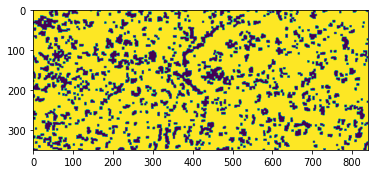

In [ ]:
image = cv2.imread("/content/Surgical-Pathology.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = get_mask(gray_image)
plt.imshow(mask)

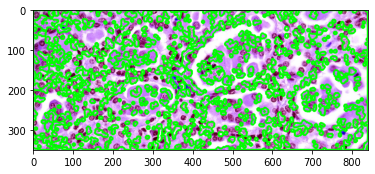

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
plt.imshow(cv2.drawContours(image, contours, -1, (0, 255, 0), 3))

In [ ]:
print('Counted cells: ', len(contours))

Counted cells:  389
